# Income Prediction using Gradient Boosting

![gradient boosting image](https://media.geeksforgeeks.org/wp-content/uploads/20200721214745/gradientboosting.PNG)

Image thanks to [Geeks for Geeks](https://www.geeksforgeeks.org/ml-gradient-boosting/)

STEPS:
1. import and prepare a dataset for modeling
2. test and evaluate 3 different boosting models and compare the fit times of each.
3. tune the hyperparameters of the best model to reduce overfitting and improve performance.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, plot_confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In this simple project, we will be working with census data.  Our goal is to predict whether a person will make more or less than $50k per year in income.

The data is available [here](https://drive.google.com/file/d/1drlRzq-lIY7rxQnvv_3fsxfIfLsjQ4A-/view?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
df = pd.read_excel('/content/drive/MyDrive/Coding Dojo/Datasets/census_income.xlsx')
df

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,0.0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,1.0,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,2.0,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,3.0,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,4.0,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556.0,27.0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,32557.0,40.0,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,32558.0,58.0,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,32559.0,22.0,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [ ]:
# get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      32561 non-null  float64
 1   age             32561 non-null  float64
 2   workclass       32561 non-null  object 
 3   education       32561 non-null  object 
 4   marital-status  32561 non-null  object 
 5   occupation      32561 non-null  object 
 6   relationship    32561 non-null  object 
 7   race            32561 non-null  object 
 8   sex             32561 non-null  object 
 9   capital-gain    32561 non-null  float64
 10  capital-loss    32561 non-null  float64
 11  hours-per-week  32561 non-null  float64
 12  native-country  32561 non-null  object 
 13  income-class    32561 non-null  object 
dtypes: float64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
# get statistical data
df.describe()

,Unnamed: 0,age,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,16280.000000,38.581647,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,7385.292085,402.960219,12.347429
min,0.000000,17.000000,0.000000,0.000000,1.000000
25%,8140.000000,28.000000,0.000000,0.000000,40.000000
50%,16280.000000,37.000000,0.000000,0.000000,40.000000
75%,24420.000000,48.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,99999.000000,4356.000000,99.000000


Prepare the dataset for modeling.
1. Check for missing data, bad data, and duplicates.
2. Check your target class balance.
3. Perform your validation split
4. Create a preprocessing pipeline to use with your models.
5. Fit and evaluate your models using pipelines

## Data Cleaning

In [ ]:
# check the number of missing values and duplicates
print(f'Missing Values: \n{df.isna().sum()}')
print(f'\nDuplicates: {df.duplicated().sum()}')

Missing Values: 
Unnamed: 0        0
age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income-class      0
dtype: int64

Duplicates: 0


In [ ]:
# check the target balance
df['income-class'].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income-class, dtype: float64

## Validation Split

In [ ]:

# assign X features and y target
X = df.drop(columns=['Unnamed: 0', 'income-class'])
y = df['income-class']

# split the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, stratify=y)

## Preprocessing

In [ ]:
# intantiate scaler and one-hot encoder
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

# selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# tuples
cat_tuple = (ohe, cat_selector)
num_tuple = (scaler, num_selector)

# transformers
preprocessor = make_column_transformer(cat_tuple, num_tuple)
preprocessor

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe2bc47b9d0>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe2bd18c510>)])

# eXtreme Gradient Boosting


In [ ]:
# instantiate the XBG Boost
xgb = XGBClassifier()

# pipeline the preprocessor and model
xgb_pipe = make_pipeline(preprocessor, xgb)

In [ ]:
%%time
# train the model
xgb_pipe.fit(X_train, y_train)

CPU times: user 1.33 s, sys: 49.5 ms, total: 1.38 s
Wall time: 1.48 s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe2bc47b9d0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe2bd18c510>)])),
                ('xgbclassifier', XGBClassifier())])

In [ ]:
print(f'Training: \n{classification_report(y_train, xgb_pipe.predict(X_train))}')
print(f'Testing: \n{classification_report(y_test, xgb_pipe.predict(X_test))}')

Training: 
              precision    recall  f1-score   support

       <=50K       0.88      0.96      0.91     18539
        >50K       0.80      0.58      0.67      5881

    accuracy                           0.86     24420
   macro avg       0.84      0.77      0.79     24420
weighted avg       0.86      0.86      0.86     24420

Testing: 
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      6181
        >50K       0.80      0.58      0.67      1960

    accuracy                           0.86      8141
   macro avg       0.84      0.77      0.79      8141
weighted avg       0.86      0.86      0.86      8141



Which target class is your model better at predicting?  Is it significantly overfit?

## LightGBM

In [ ]:
%%time

# instantiate the model
lgbmc = LGBMClassifier()

# pipeline
lgbmc_pipe = make_pipeline(preprocessor, lgbmc)

# train the model
lgbmc_pipe.fit(X_train, y_train)

CPU times: user 512 ms, sys: 8.73 ms, total: 521 ms
Wall time: 538 ms


In [ ]:
print(f'Training: \n{classification_report(y_train, lgbmc_pipe.predict(X_train))}')
print(f'Testing: \n{classification_report(y_test, lgbmc_pipe.predict(X_test))}')

Training: 
              precision    recall  f1-score   support

       <=50K       0.91      0.95      0.93     18539
        >50K       0.81      0.69      0.74      5881

    accuracy                           0.89     24420
   macro avg       0.86      0.82      0.84     24420
weighted avg       0.88      0.89      0.88     24420

Testing: 
              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      6181
        >50K       0.78      0.67      0.72      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.80      0.82      8141
weighted avg       0.87      0.87      0.87      8141



## GradientBoostingClassifier

In [ ]:
%%time
# instantiate the model
gradient = GradientBoostingClassifier()

# pipeline
gradient_pipe = make_pipeline(preprocessor, gradient)

# train the model
gradient_pipe.fit(X_train, y_train)

CPU times: user 2.72 s, sys: 39.5 ms, total: 2.76 s
Wall time: 2.76 s


In [ ]:
print(f'Training: \n{classification_report(y_train, gradient_pipe.predict(X_train))}')
print(f'Testing: \n{classification_report(y_test, gradient_pipe.predict(X_test))}')

Training: 
              precision    recall  f1-score   support

       <=50K       0.88      0.96      0.92     18539
        >50K       0.81      0.59      0.68      5881

    accuracy                           0.87     24420
   macro avg       0.84      0.77      0.80     24420
weighted avg       0.86      0.87      0.86     24420

Testing: 
              precision    recall  f1-score   support

       <=50K       0.88      0.96      0.92      6181
        >50K       0.81      0.59      0.68      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.77      0.80      8141
weighted avg       0.86      0.87      0.86      8141



In [ ]:
gradient_pipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe2bc47b9d0>),
                                 ('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe2bd18c510>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(handle_unknown='ignore'),
 'columntransformer__onehotencoder__categories': 'auto',
 'columntransformer__onehotencoder__drop': None,
 'columntransformer__onehotencoder__dtype': numpy.float64,
 'columntransformer__onehotencoder__handle_unknown': 'ignore',
 'columntransformer__onehotencoder__sparse': True,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__standardscaler': StandardScaler(),
 'column


# Tuning Gradient Boosting Models


In [ ]:
%%time
# set params to use for hyperparameter tuning
params = {'gradientboostingclassifier__n_estimators':[5,250],
          'gradientboostingclassifier__max_depth':[3,5],
          'gradientboostingclassifier__learning_rate':[0.01,0.1]}

# instantiate the model
gradient_pipe_2 = make_pipeline(preprocessor, gradient)

# instantiate GridSearchCV
gradient_grid = GridSearchCV(gradient_pipe_2, params, cv=3)

# fit the model
gradient_grid.fit(X_train, y_train)

CPU times: user 1min 42s, sys: 628 ms, total: 1min 43s
Wall time: 1min 43s


In [ ]:
gradient_grid.best_params_

{'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__max_depth': 5,
 'gradientboostingclassifier__n_estimators': 250}

# Evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Testing: 
              precision    recall  f1-score   support

       <=50K       0.88      0.96      0.92      6181
        >50K       0.81      0.59      0.68      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.77      0.80      8141
weighted avg       0.86      0.87      0.86      8141



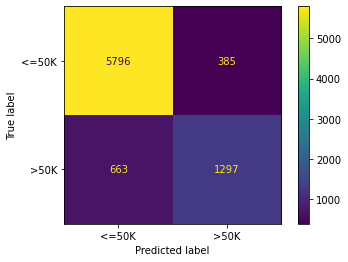

In [ ]:
plot_confusion_matrix(gradient_grid.best_estimator_, X_test, y_test)
print(f'Testing: \n{classification_report(y_test, gradient_pipe.predict(X_test))}')

In conclusion, the model performance is consistent by using the defaults and by doing hyperparameter tuning. The model's performance based on precision metric shows 77% (1297) of individuals flagged with more than 50K income were actually correct. And recall showed the 66% were classified correctly with regards to their income-class.

Doing some hyperparameter tuning on the model resulted to a slower model execution.